랜덤 포레스트
- 랜덤한 결정 트리를 여러개 묶은 모델
- 데이터 : 부트스트랩(중복이 될 수 있음)

In [1]:
#119
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.target_names #2진 분류 classification

array(['malignant', 'benign'], dtype='<U9')

In [4]:
#결정 트리 vs 랜덤포레스트

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

In [29]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [30]:
dt.score(X_test, y_test)

0.8951048951048951

In [31]:
rf.score(X_test, y_test)

0.965034965034965

In [32]:
dt.feature_importances_

array([0.        , 0.0096886 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69955965, 0.01204155, 0.        ,
       0.01948008, 0.        , 0.        , 0.01676117, 0.017502  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04058449, 0.06706044, 0.        , 0.07315114, 0.        ,
       0.00975173, 0.00995974, 0.        , 0.0244594 , 0.        ])

In [33]:
rf.feature_importances_

array([0.0325695 , 0.01797639, 0.07679371, 0.03093119, 0.00482869,
       0.00741291, 0.0513581 , 0.11457897, 0.00359964, 0.00416271,
       0.02070981, 0.00499373, 0.01899052, 0.03336478, 0.00343015,
       0.00753552, 0.00543575, 0.00669586, 0.00353715, 0.00736574,
       0.1152224 , 0.0175397 , 0.16584975, 0.04440724, 0.01440821,
       0.01866186, 0.02178275, 0.12718987, 0.01189414, 0.00677325])

In [35]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

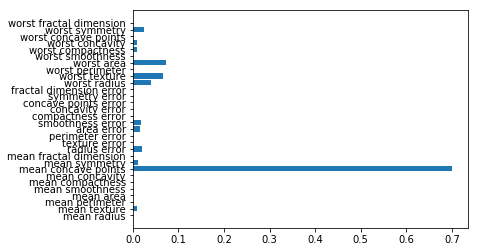

In [37]:
plt.barh(cancer.feature_names, dt.feature_importances_)

<BarContainer object of 30 artists>

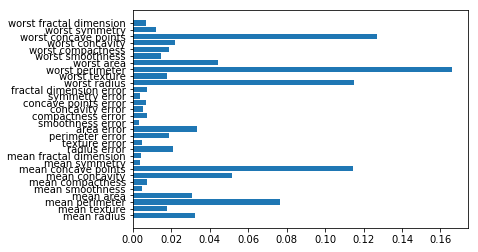

In [38]:
plt.barh(cancer.feature_names, rf.feature_importances_)

# 그라디언트 부스팅 회귀 트리
- 랜덤포레스트 : 여러 나무를 서로 다른 데이터로 독립적으로 학습(병렬 가능)
- Gradient boosting decision tree : 나무 하나씩 순차적으로 학습, 이전 나무의 오류를 최소화 하는 방향으로 학습
    - 작은 나무 : 1~5 (작다란? max_depth가 작고, leaf도 작다) => 약한 학습 트리
    

In [40]:
# p122
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

In [43]:
gbc.score(X_train, y_train), gbc.score(X_test, y_test) #과적합 => 트리 작게 만들기 => 사전/사후 가지치기

(1.0, 0.958041958041958)

In [46]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train) # 아주 작게 만듬
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(0.9906103286384976, 0.972027972027972)

<BarContainer object of 30 artists>

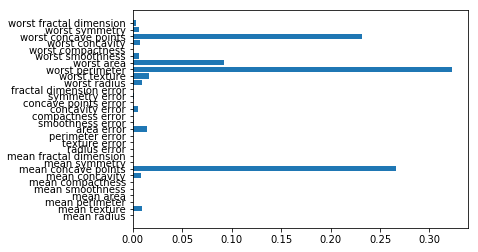

In [47]:
plt.barh(cancer.feature_names, gbc.feature_importances_)

# p131 에이다 부스트 AdaBoost
- 그라디언트 부스트 트리와 비슷하지만,
- 차이 : 이전 트리의 오차를 최소화
         이전 트리의 오차 샘플에 가중치를 높여서 다음 트리에서 학습

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
adc = AdaBoostClassifier(random_state=0).fit(X_train, y_train) # 아주 작게 만듬
adc.score(X_train, y_train), adc.score(X_test, y_test)

(1.0, 0.9790209790209791)

<BarContainer object of 30 artists>

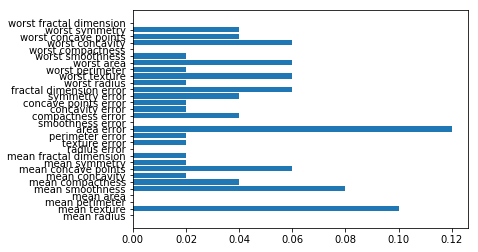

In [51]:
plt.barh(cancer.feature_names, adc.feature_importances_)

결정 트리
    -> 과적합 줄이기 위해 : 앙상블 - 보통 안정적인 랜덤 포레스트 먼저사용
    -> 더 성능을 높이기 위해 : 앙상블 - Gradient Tree / 에이다 부스트
* 최종결정은 score를 통해서 하기(분류는 투표로, 예측은 평균으로)

# p134 SVM(support vector machine)
- p139 : 일부 데이터 포인트 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지 배움

In [55]:
from sklearn.svm import SVC, SVR #svm-c 분류용, svm-r 회귀용
import mglearn

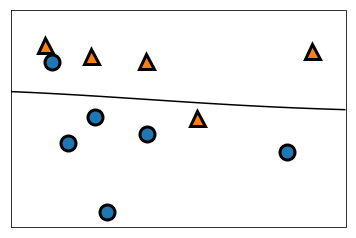

In [63]:
c = 1
g = 0.1
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=c, gamma=g).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0], sv[:,1],sv_labels, s=15, markeredgewidth=3)
# c - 규제변수(작으면 넓은범위에 영향을 줌) => 작을수록 일반화
# gamma - 하나의 샘플이 미치는 영향의 범위(작을수록 넓은 영역을 의미하고 큰 값으면 영향이 미치는 범위가 제한적) => 작을수록 일반화

In [64]:
sv = SVC(gamma='auto').fit(X_train, y_train)
sv.score(X_train, y_train), sv.score(X_test, y_test)
#값을 정규화 하면 95%까지 상승, C를 올리면 97%

(1.0, 0.6293706293706294)

# 신경망(neural network) : 다층 퍼셉트론 (mltilayer perceptrons)


In [65]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

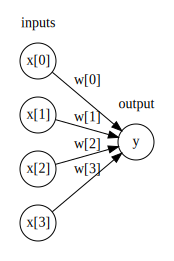

In [66]:
#logistic_regression
display(mglearn.plots.plot_logistic_regression_graph())

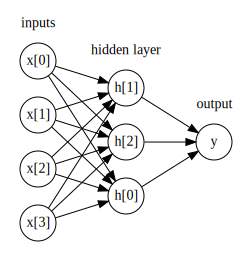

In [68]:
# 신경망
display(mglearn.plots.plot_single_hidden_layer_graph())

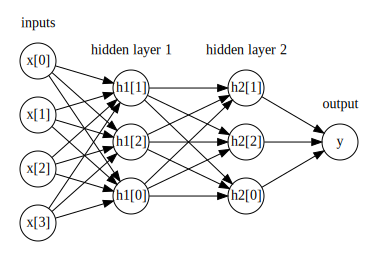

In [69]:
display(mglearn.plots.plot_two_hidden_layer_graph())
# 히든 레이어가 없으면 Linear/Logistic regression
# 히든 레이어가 1-3이면 신경망(mlp)
# 히든 레이어가 10-100-1000 많아진 모델을 딥 뉴럴 네트워크라고 합니다.(2000년 이후)

In [84]:
# 3, 3 히든 레이어
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 50)).fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test, y_test)
# 장점 : 모델을 내 마음대로 설계 가능, 성능 좋음
# 단점 : 어떤 형태가 가장 좋은지 알 기 힘듬, 학습 속도가 느린편, 분석이 까다로움

(0.92018779342723, 0.9370629370629371)

1. knn - 예측/분류
2. linear regression - 예측 / linear regression - 분류

-

3. decision tree - 예측/분류
4. random forest(앙상블)
5. gradient Boost Decision Tree

-

6. Ada Goost
7. SVM - SVC분류/SVR예측
8. MLP(뉴럴네트워크)